# Local HRTF interpolation

*Fabian Brinkmann*<br>  
*Audio Communication Group, Technische Universität Berlin*<br>  
*Contact: fabian.brinkmann@tu-berlin.de*

HRTF interpolation is important to obtain HRTF for any desired source position. In this simple example you will interpolate HRTFs in the horizontal and median plane. In this special case the interpolation weights are easy to compute and you can focus on signal processing and look how the results change if you increase the angular spacing between the HRTFs or use a different pre-processing.

**Duration:** 45-60 Minutes

**Requirements:** Basic knowledge of HRTFs, coordinate conventions, onset detection in impulse responses, and digital signal processing

**References**<br>  
[1] J. M. Arend, Pörschmann, Christoph, S. Weinzierl, and F. Brinkmann, “Magnitude Corrected and Time-Aligned HRTF Interpolation: Effect of Interpolation and Alignment Method,” in Fortschritte der Akustik – DAGA 2023, Hamburg, Germany: DEGA, Mar. 2023, pp. 1098–1001. [(Download)](https://pub.dega-akustik.de/DAGA_2023/data/articles/000100.pdf)<br>  
[2] A. Andreopoulou and B. F. G. Katz, “Identification of perceptually relevant methods of inter-aural time difference estimation,” J. Acoust. Soc. Am., vol. 142, no. 2, pp. 588–598, Aug. 2017, doi: [10.1121/1.4996457](https://doi.org/10.1121/1.4996457)

**Dependencies**<br>  
`pip install pyfar>=0.7 nbgrader ipykernel watermark`

In [ ]:
import pyfar as pf
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio, display
%matplotlib inline

### 1: Select HRTFs for interpolation

For simplicity, lets always interpolate to a source in front that has a lateral and polar angle of 0 degree:


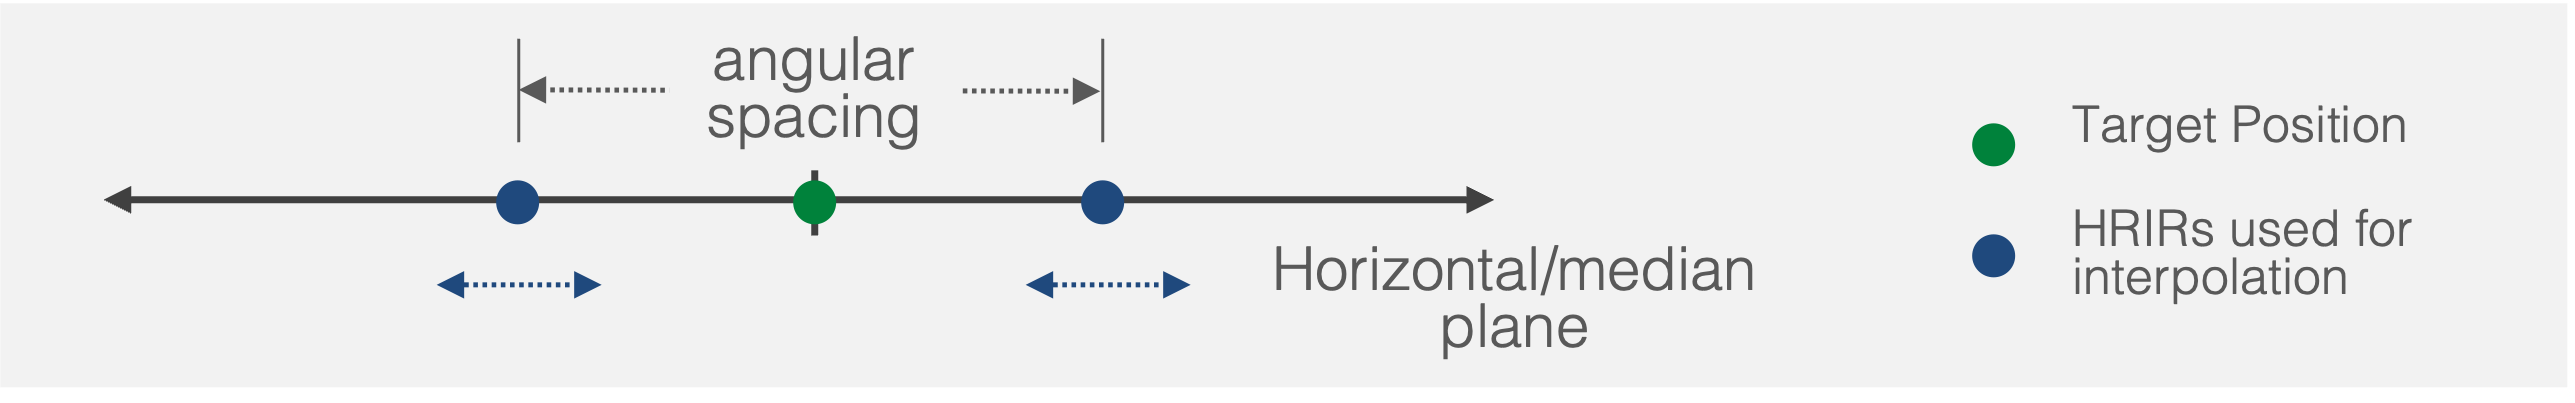

In [ ]:
# Select the plane and load data for interpolation
# - 'horizontal': In this case HRTFs with different lateral angles but
#                 identical polar angles of 0 degree are interpolated.
# - 'median':     In this case HRTFs with different polar angles but
#                 identical lateral angles of zero degree are interpolated.
plane = 'horizontal'
hrirs, sources = pf.signals.files.head_related_impulse_responses(plane)

# Set the angular spacing in degrees. Because the spatial resolution of the
# HRTFs is 2 degrees, this must be a multiple of 4
angular_spacing = 32
assert angular_spacing % 4 == 0, "Spacing must be a multiple of 4 degrees."

# get indices of HRTFs used for interpolation
# YOUR CODE HERE
raise NotImplementedError()


### 2. Interpolate

Now interpolate to the target position. Implement three different methods:

- `'time'` interpolate HRIRs as they are
- `'magnitude_phase'` separately averages the magnitude and unwrapped phase of the HRTF spectra
- `'time_aligned'`
  - align the HRIRs before interpolation. This can for example be done by finding the HRIR onsets (see [1] and [2]) and applying a cyclic time-shift with sub-sample precision.
  - interpolate aligned HRIRs in the time domain
  - interpolate HRIR onsets
  - reverse the alignment using the interpolated HRIR onsets

In [ ]:
# select the method for interpolation
# 'time', 'time_aligned', or 'magnitude_phase'
method = 'time_aligned'

# get HRIRs
# YOUR CODE HERE
raise NotImplementedError()

if method == 'time':
    # interpolate with equal interpolation weights
    # YOUR CODE HERE
    raise NotImplementedError()

elif method == 'time_aligned':
    # align
    # YOUR CODE HERE
    raise NotImplementedError()

    # interpolate with equal interpolation weights. Could be done with
    # pyfar.dap.average as well (see below)
    # YOUR CODE HERE
    raise NotImplementedError()

    # reverse alignment
    # YOUR CODE HERE
    raise NotImplementedError()

elif method == 'magnitude_phase':
    # interpolation with equal weights separately for magnitude and phase
    # YOUR CODE HERE
    raise NotImplementedError()

else:
    raise ValueError('Unknown method')

### 3. Plot the result

A good and quick way of checking the results is plotting - go ahead and plot:

- the HRIRs and HRTFs used for interpolation
- the interpolated and target HRIRs and HRTFs

In [ ]:
# 2 x 2 subplot layout:
# - left ear data in first column, right ear data in second
# - HRIRs in first row, HRTFs in second
pf.plot.use()
fig, axes = plt.subplots(2,2, sharey='row', sharex='row', figsize=(8,6))

# HRTFs in front (polar = lateral = 0 degree) are the target (reference)
target = hrirs[np.logical_and(sources.lateral == 0, sources.polar == 0), :]

# plot targer, input, and interpolated HRIRs and HRTFs
for ear, label in zip(range(2), ['left', 'right']):
# YOUR CODE HERE
raise NotImplementedError()

### 4. Listen to the results

Plots give a quick impression and are useful vor a visual check and also visual comparison across different conditions. A second check should always be listening to the results. Go ahead and listen to the interpolated and target HRIR.

- Do you perceive the sound using the interpolated HRIRs from the correct location?
- Does the sound color of the interpolated example match that of the target?

In [ ]:
# select an audio content
content = 'castanets'
if content == 'noise':
    content = pf.signals.noise(44100, 'pink')
elif content == 'castanets':
    content = pf.signals.files.castanets(target.sampling_rate)

# simple approximation for a headphone filter
headphone_filter = pf.dsp.filter.bell(
    pf.signals.impulse(2**6), 5e3, -10, .75)

# convolve the target and interpolated signals with the content and the
# headphone filter
# YOUR CODE HERE
raise NotImplementedError()

# render the target and interpolated audio using iPython widgets:
# You can directly use this code if your Signals are named `target_audio` and
# `interpolated_audio`
target_player = Audio(
    target_audio.flatten().time, rate=target_audio.sampling_rate)
display('Target audio:')
display(target_player)

interpolated_player = Audio(
    interpolated_audio.time, rate=interpolated_audio.sampling_rate)
display('Interpolated audio:')
display(interpolated_player)

### 5. Exploration

After you coded all the above it's time to play. For example, you can

- try to find the angular spacing above which you perceive differences between the target and interpolated HRTF - you could do this for each method.
- try the interpolation for different target sound sources. Interpolation for sources to the side of the listener often results in larger artifacts.
- play around with different audio contents. Noise or noise bursts are often used to reveal subtle differences, which is helpful for developing algorithms. Speech or music are good examples of real-life signals that are more relevant for actual applications.
- read about how interpolation weights are defined for an arbitrary set of source positions using Barycentric or Natural Neighbor interpolation.

# Watermark

The following watermark might help others to install specific package versions that might be required to run the notebook. Please give at least the versions of Python, IPython, numpy , and scipy, major third party packagers (e.g., pytorch), and all used pyfar packages.

In [ ]:
%load_ext watermark
%watermark -v -m -p numpy,scipy,pyfar,sofar,nbgrader,watermark